In [65]:
### Encoding categorical variables
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np


ca_df = pd.read_csv("marketing_customer_analysis_clean.csv")

In [66]:
ca_df.head()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1


In [67]:
ca_df = ca_df.drop(columns = ["unnamed:_0", "customer", "effective_to_date"])

In [68]:
ca_df

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,Arizona,4809.216960,No,Basic,College,Employed,M,48029,Suburban,Married,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,California,2228.525238,No,Basic,College,Unemployed,F,0,Suburban,Single,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,Oregon,5259.444853,No,Basic,College,Employed,F,61146,Urban,Married,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,California,11971.977650,No,Premium,College,Employed,F,64195,Urban,Divorced,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [69]:
categoricals = ca_df.select_dtypes(include=object)
numericals = ca_df.select_dtypes(include = np.number)

In [70]:
ca_df["education"].unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [71]:
ordinals = categoricals[["coverage","education","vehicle_size"]]
nominals = categoricals.drop(columns=["coverage","education","vehicle_size"])

In [72]:
from sklearn.preprocessing import OrdinalEncoder

In [73]:
enc = OrdinalEncoder(categories=[["Basic","Extended","Premium"]])

ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])

enc = OrdinalEncoder(categories=[["High School or Below", "College", "Bachelor","Master", "Doctor"]])

ordinals["education"] = enc.fit_transform(ordinals[["education"]])

enc = OrdinalEncoder(categories=[["Small","Medsize","Large"]])

ordinals["vehicle_size"] = enc.fit_transform(ordinals[["vehicle_size"]])

<ipython-input-73-c2d63f1cbcc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["coverage"] = enc.fit_transform(ordinals[["coverage"]])
<ipython-input-73-c2d63f1cbcc5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals["education"] = enc.fit_transform(ordinals[["education"]])
<ipython-input-73-c2d63f1cbcc5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [74]:
ordinals

,coverage,education,vehicle_size
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,2.0,1.0
3,1.0,1.0,1.0
4,2.0,2.0,1.0
...,...,...,...
10905,2.0,2.0,1.0
10906,0.0,1.0,1.0
10907,1.0,2.0,1.0
10908,2.0,1.0,1.0


In [75]:
nominals = pd.get_dummies(nominals)

In [76]:
nominals

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1


### Numericals

In [77]:
numericals = ca_df.select_dtypes(include='number')
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [78]:
#dropping nas
numericals = numericals.dropna()

In [79]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [80]:
#dropping duplicates
numericals = numericals.drop_duplicates()

In [81]:
numericals.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

### CONCAT

In [82]:
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [83]:
final_df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'polic

### dropping nans

In [84]:
final_df.dropna(inplace=True)

### Lab instructions : 

1) Compute R2 for the first model iteration + feature importance plot
2) Run the 2nd iteration of the model, adding the categorical data

### X-y Split

In [85]:
X = final_df[['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'month', 'coverage', 'education', 'vehicle_size', 'state_Arizona',
       'state_California', 'state_Nevada', 'state_Oregon', 'state_Washington',
       'response_No', 'response_Yes', 'employmentstatus_Disabled',
       'employmentstatus_Employed', 'employmentstatus_Medical Leave',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2', 'policy_Special L3', 'renew_offer_type_Offer1',
       'renew_offer_type_Offer2', 'renew_offer_type_Offer3',
       'renew_offer_type_Offer4', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'sales_channel_Web', 'vehicle_class_Four-Door Car',
       'vehicle_class_Luxury Car', 'vehicle_class_Luxury SUV',
       'vehicle_class_SUV', 'vehicle_class_Sports Car',
       'vehicle_class_Two-Door Car', 'vehicle_type_A']]
y = final_df[["total_claim_amount"]]

### Train test split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [88]:
#Standardize the data (after the data split!).

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [89]:
X_test_scaled = scaler.transform(X_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000152A3010CD0>]],
      dtype=object)

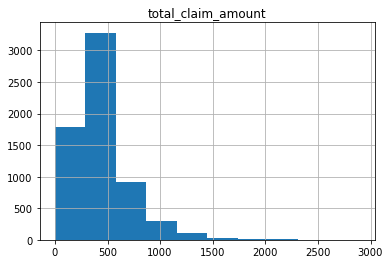

In [90]:
y_train.hist()

In [91]:
pt = PowerTransformer()

In [92]:
pt.fit(y_train)
y_train = pt.transform(y_train)

In [93]:
y_test = pt.transform(y_test)

### Model Training

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [96]:
model.coef_

array([[-1.16989737e-07, -1.00934903e-06,  1.37862140e-02,
         6.82294758e-04, -5.25888381e-05, -3.24233951e-03,
         1.86804624e-03,  6.05339946e-03,  2.97448470e-02,
        -1.67529599e-02, -1.60807537e-02,  1.17399943e-03,
         1.24317910e-02,  2.98140784e-03, -2.11509047e-02,
         4.56370641e-03,  3.00714293e-02, -3.00714293e-02,
        -4.30810044e-02, -2.66169291e-02,  4.63632030e-03,
        -7.45086168e-02,  1.39570230e-01, -1.89566413e-02,
         1.89566413e-02, -9.70415566e-01,  7.61111866e-01,
         2.09303700e-01, -5.78054733e-02, -7.34854325e-02,
         1.31290906e-01, -2.39102324e-02, -1.34452999e-02,
         3.73555323e-02,  4.83112436e-03, -3.02888762e-02,
         1.54751943e-03,  5.54406561e-03, -1.24887576e-02,
        -6.50060800e-03,  1.05766093e-01, -6.66359619e-03,
        -6.17469649e-02, -1.25776960e-02,  1.56177598e-02,
        -5.81247868e-03,  2.77241493e-03, -2.45179226e-03,
        -1.61052671e-04,  8.07131446e-03, -5.45846953e-0

In [97]:
model.intercept_

array([-1.55537405])

### Predict total claim amount

In [98]:
random_claim = pd.DataFrame(X_test).sample()

In [99]:
random_claim

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,coverage,education,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
10422,5595.389905,74454.0,71.0,15.149071,29.0,0.384256,3.0,2.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1


In [100]:
model.predict(random_claim)

array([[0.1180367]])

In [101]:
pt.inverse_transform(model.predict(random_claim))

array([[413.42828069]])

### Create predictions for test set

In [102]:
y_pred = model.predict(X_test)

In [103]:
# inverse transforming predictions

In [104]:
pt.inverse_transform(y_pred)

array([[498.81044096],
       [421.72788308],
       [383.05960659],
       ...,
       [227.25378861],
       [397.30180327],
       [ 59.60148751]])

In [105]:
y_pred = pd.DataFrame(y_pred)

In [106]:
y_test = pd.DataFrame(y_test)

In [107]:
y_test = y_test.reset_index(drop=True)

In [108]:
residuals_df = pd.concat([y_test,y_pred],axis=1)

In [109]:
residuals_df.columns = ["y_test","y_pred"]

In [110]:
residuals_df

,y_test,y_pred
0,0.165285,0.398591
1,0.014128,0.146611
2,-0.146564,0.010738
3,0.142178,0.426614
4,0.142038,0.205705
...,...,...
2147,0.864817,0.696157
2148,0.947189,0.762369
2149,-0.402655,-0.631041
2150,0.235706,0.061612


In [111]:
residuals_df["residuals"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [112]:
residuals_df

,y_test,y_pred,residuals
0,0.165285,0.398591,-0.233307
1,0.014128,0.146611,-0.132483
2,-0.146564,0.010738,-0.157301
3,0.142178,0.426614,-0.284436
4,0.142038,0.205705,-0.063667
...,...,...,...
2147,0.864817,0.696157,0.168660
2148,0.947189,0.762369,0.184820
2149,-0.402655,-0.631041,0.228385
2150,0.235706,0.061612,0.174094


### Calculating metrics

In [113]:
mean_error = residuals_df["residuals"].mean()

In [114]:
mean_error

0.00035385066452506037

In [115]:
from sklearn.metrics import mean_squared_error as mse , mean_absolute_error as mae

In [116]:
mse(y_test,y_pred)

0.17249304864515616

In [117]:
mae(y_test,y_pred)

0.3152223081419685

In [118]:
rmse = mse(y_test,y_pred, squared = False)
rmse

0.41532282461376496

In [119]:
from sklearn.metrics import r2_score

### Computing R2_score for test_set

In [120]:
round(r2_score(y_test, y_pred),2)

0.83

### Computing R2_score_for_train_set

In [121]:
y_pred_train = pd.DataFrame(model.predict(X_train))

In [122]:
r2_score(y_train,y_pred_train)

0.8356261254454008

### Graph

In [123]:
feature_names = list(X_train.columns)

In [124]:
coefficients = model.coef_

In [125]:
coefficients = [i for i in coefficients[0]]

In [129]:
final_dict = {"name":feature_names,"coeff":coefficients}
final_df = pd.DataFrame(final_dict)
final_df

,name,coeff
0,customer_lifetime_value,-1.169897e-07
1,income,-1.009349e-06
2,monthly_premium_auto,1.378621e-02
3,months_since_last_claim,6.822948e-04
4,months_since_policy_inception,-5.258884e-05
5,number_of_open_complaints,-3.242340e-03
6,number_of_policies,1.868046e-03
7,month,6.053399e-03
8,coverage,2.974485e-02
9,education,-1.675296e-02


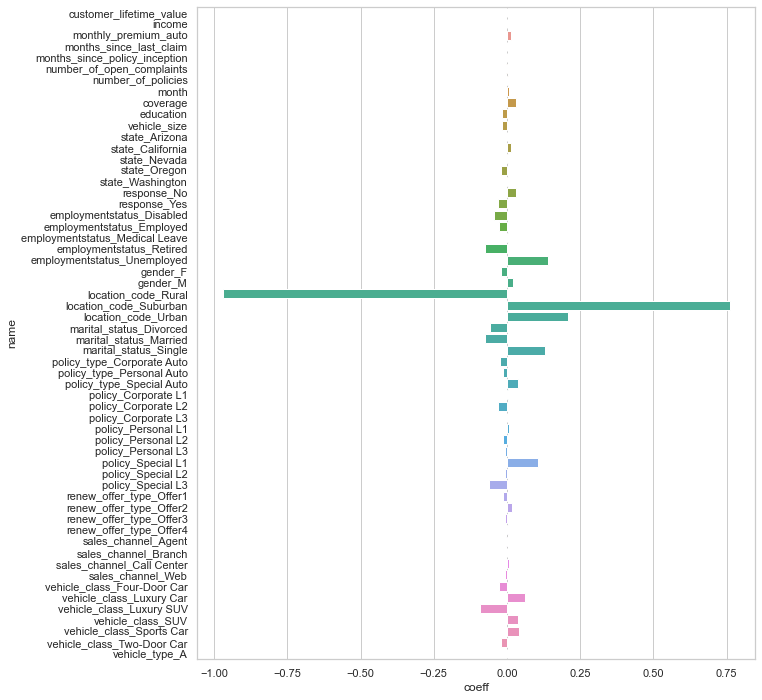

In [132]:
import seaborn as sns
fi_df_sorted = final_df.sort_values(by = "coeff", ascending = False)
import matplotlib.pyplot as plt
plt.figure(figsize = (10,12))
sns.barplot(y = final_df["name"], x = final_df["coeff"])

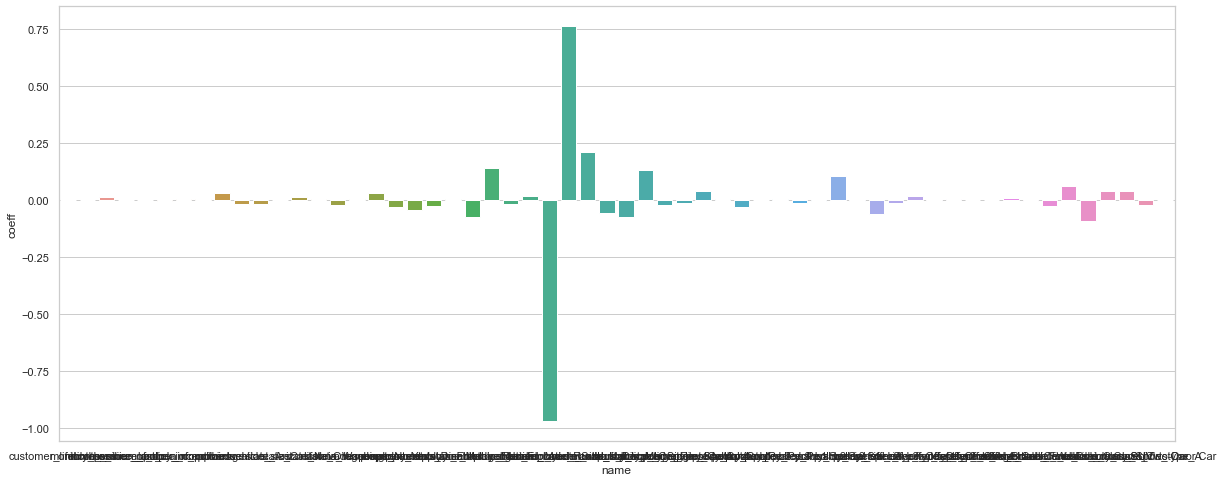

In [130]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))

sns.barplot(x = final_df["name"],y =final_df["coeff"])

In [131]:
X_train["location_code_Suburban"].describe()

count    6455.000000
mean        0.617041
std         0.486146
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: location_code_Suburban, dtype: float64

In [133]:
X_train["location_code_Rural"].describe()

count    6455.000000
mean        0.200930
std         0.400726
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: location_code_Rural, dtype: float64